In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
runDir = r"E:\Programming\Python\MJ\Projects\Population growth and markets\Population-growth-and-market\Population Data US"

if os.getcwd() != runDir:
    os.chdir(runDir)
files = os.listdir(runDir)

In [3]:
US = pd.read_csv('us.1969_2018.19ages.adjusted.txt',names=['Dict'])

In [4]:
# https://seer.cancer.gov/popdata/popdic.html (Dictionary Format)
US['Year'] = US['Dict'].str[:4]
US['State'] = US['Dict'].str[4:6]
US['State FIPS'] = US['Dict'].str[6:8]
US['County FIPS'] = US['Dict'].str[8:11]
US['Registry'] = US['Dict'].str[11:13]
US['Race'] = US['Dict'].str[13]
US['Origin'] = US['Dict'].str[14]
US['Sex'] = US['Dict'].str[15]
US['Age'] = US['Dict'].str[16:18]
US['Population'] = US['Dict'].str[18:]
US['Population'] = US['Population'].astype(int)

In [5]:
dict_Registry={
'01' : 'San Francisco-Oakland SMSA','02' : 'Connecticut',
'20' : 'Detroit (Metropolitan)', '21' : 'Hawaii',
'22' : 'Iowa','23' : 'New Mexico','25' : 'Seattle (Puget Sound)',
'26' : 'Utah','27' : 'Atlanta (Metropolitan)','29' : 'Alaska',
'31' : 'San Jose-Monterey','33' : 'Arizona','35' : 'Los Angeles',
'37' : 'Rural Georgia','41' : 'California excluding SF/SJM/LA',
'42' : 'Kentucky','43' : 'Louisiana','44' : 'New Jersey',
'47' : 'Georgia excluding Atlanta/Rural Georgia',
'61' : 'Idaho','62' : 'New York','63' : 'Massachusetts',
'99' : 'Registry for non-SEER area'}

dict_race = {'1' : 'White' , '2' : 'Black', '3' : 'Other'}

dict_origin = {'0' : 'Non-Hispanic','1' : 'Hispanic','9' : 'Not applicable in 1969+ W,B,O files'}

dict_sex = {'1' : 'Male', '2' : 'Female'}

dict_age = {'00' : '0 years', '01' : '1-4 years', '02' : '5-9 years', '03' : '10-14 years', '04' : '15-19 years',
            '05' : '20-24 years', '06':'25-29 years', '07':'30-34 years', '08':'35-39 years','09':'40-44 years',
           '10':'45-49 years','11':'50-54 years','12':'55-59 years','13':'60-64 years','14':'65-69 years',
           '15':'70-74 years','16':'75-79 years','17':'80-84 years','18':'85+ years'}

In [6]:
US['Registry'] = US['Registry'].map(dict_Registry)
US['Race'] = US['Race'].map(dict_race)
US['Origin'] = US['Origin'].map(dict_origin)
US['Sex'] = US['Sex'].map(dict_sex)
US['Age'] = US['Age'].map(dict_age)

In [7]:
US_grouped = US.groupby(['Year','Age'])['Population'].sum()
US_grouped

Year  Age        
1969  0 years         3494217
      1-4 years      13611445
      10-14 years    20632511
      15-19 years    18764655
      20-24 years    15470133
                       ...   
2018  65-69 years    17086893
      70-74 years    13405423
      75-79 years     9267066
      80-84 years     6127308
      85+ years       6544503
Name: Population, Length: 950, dtype: int32

In [8]:
US_top = US_grouped.loc[:,'40-44 years'] + US_grouped.loc[:,'45-49 years'] 
US_bottom = US_grouped.loc[:,'60-64 years'] + US_grouped.loc[:,'65-69 years']
MO = US_top/US_bottom
dfMOT1 = MO.loc['1980':]

In [9]:
dfMOT1 = dfMOT1.to_frame().reset_index()
dfMOT1 = dfMOT1.rename(columns={'Population':'M/O Ratio'})
dfMOT1 = dfMOT1[['M/O Ratio','Year']]

In [11]:
# First = 1900 to 1979
First = files[0:8]

d = {}  # dictionary that will hold them

for file_name in First:  # loop over files
    # read csv into a dataframe and add it to dict with file_name as it key
    d[file_name[0:4]] = pd.read_excel(file_name,
                                 names=['Age', 'Total Population'], dtype={'Age': str, 'Total Population': int},
                                 usecols="A:B", skiprows=8, skipfooter=15,sheet_name=None)
    

In [12]:
mydict = {}
for key in ['0', '1', '2', '3', '4']:
    mydict[key] = 'Under 5 years'
for key in ['5', '6', '7', '8', '9']:
    mydict[key] = '5 to 9 years'
for key in ['10', '11', '12', '13', '14']:
    mydict[key] = '10 to 14 years'
for key in ['15', '16', '17', '18', '19']:
    mydict[key] = '15 to 19 years'
for key in ['20', '21', '22', '23', '24']:
    mydict[key] = '20 to 24 years'
for key in ['25', '26', '27', '28', '29']:
    mydict[key] = '25 to 29 years'
for key in ['30', '31', '32', '33', '34']:
    mydict[key] = '30 to 34 years'
for key in ['30', '31', '32', '33', '34']:
    mydict[key] = '30 to 34 years'
for key in ['35', '36', '37', '38', '39']:
    mydict[key] = '35 to 39 years'
for key in ['40', '41', '42', '43', '44']:
    mydict[key] = '40 to 44 years'
for key in ['45', '46', '47', '48', '49']:
    mydict[key] = '45 to 49 years'
for key in ['50', '51', '52', '53', '54']:
    mydict[key] = '50 to 54 years'
for key in ['55', '56', '57', '58', '59']:
    mydict[key] = '55 to 59 years'
for key in ['60', '61', '62', '63', '64']:
    mydict[key] = '60 to 64 years'
for key in ['65', '66', '67', '68', '69']:
    mydict[key] = '65 to 69 years'
for key in ['70', '71', '72', '73', '74']:
    mydict[key] = '70 to 74 years'
for key in ['75', '76', '77', '78', '79']:
    mydict[key] = '75 to 79 years'
for key in ['80', '81', '82', '83', '84']:
    mydict[key] = '80 to 84 years'
for key in ['85+']:
    mydict[key] = '85 years and above'

In [13]:
df = {}
for keys in d:
    for k in d[keys]:
        df[k]= d[keys].get(k)
        df[k].Age = df[k].Age.map(mydict)
        df[k] = df[k].groupby('Age', as_index=False)['Total Population'].sum()    

In [14]:
dfMO = {}
for i in range (1900,1980):
    a = np.array(df[str(i)].Age)
    b = np.array(df[str(i)]['Total Population'])
    totMpop = b[(a == '40 to 44 years') | (a == '45 to 49 years')].sum()
    totOpop = b[(a == '60 to 64 years') | (a == '65 to 69 years')].sum()
    MO = totMpop/totOpop
    dfMO[str(i)] = pd.DataFrame(np.array([[MO, str(i)]]),columns=['M/O Ratio', 'Year'])

In [15]:
dfMOT = dfMO['1900']
for i in range(1901,1980):
    dfMOT = pd.concat([dfMOT, dfMO[str(i)]])

In [16]:
dfMOT = pd.concat([dfMOT,dfMOT1])
dfMOT

,M/O Ratio,Year
0,2.489402697495183,1900
0,2.490276035131744,1901
0,2.49402390438247,1902
0,2.494456098291879,1903
0,2.493559718969555,1904
...,...,...
34,1.22293,2014
35,1.16747,2015
36,1.11997,2016
37,1.10238,2017


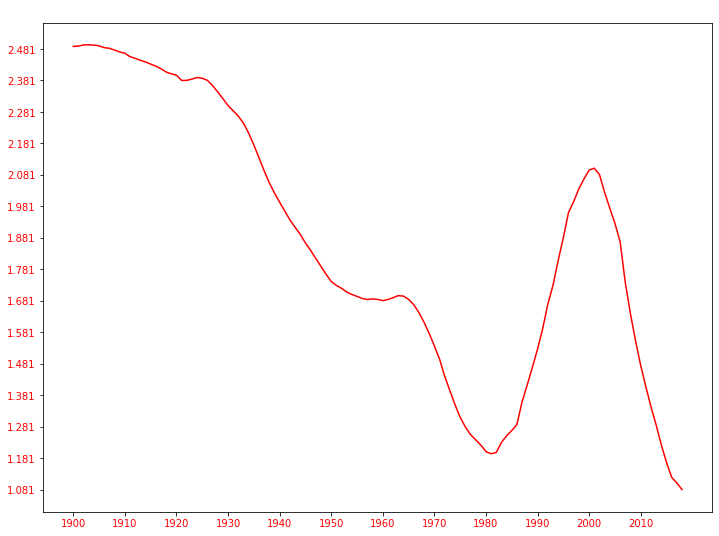

In [18]:
c = np.array(dfMOT['Year'])
c = c.astype(int)
d = np.array(dfMOT['M/O Ratio'])
d = d.astype(float)
plt.figure(figsize=(12,9))
plt.yticks(np.arange(min(d), max(d) + 0.1, 0.1))
plt.xticks(np.arange(min(c), max(c) + 1, 10))
plt.title("M/O Ratio from 1900 to 2018",color='w')
           
[i.set_color("red") for i in plt.gca().get_xticklabels()]
[i.set_color("red") for i in plt.gca().get_yticklabels()]
plt.plot(c,d,'r')
plt.savefig('MO.png')
plt.show()
